# Example 4
Built using `poetry`

## Play with datetime library pendulum

In [1]:
import pendulum

now = pendulum.now('Europe/Paris')

# Changing timezone
now.in_timezone('America/Toronto')

# Default support for common datetime formats
now.to_iso8601_string()

# Shifting
now.add(days=2)

DateTime(2020, 2, 1, 13, 23, 47, 508636, tzinfo=Timezone('Europe/Paris'))

## Timezones

In [2]:
in_utc = pendulum.datetime(2013, 3, 31, 0, 59, 59)
tz = pendulum.timezone('Europe/Paris')
in_paris = tz.convert(in_utc)
'2013-03-31T01:59:59+01:00'

# Shifting time
in_paris = in_paris.add(seconds=1)
'2013-03-31T03:00:00+02:00'
in_paris.subtract(seconds=1)
'2013-03-31T01:59:59+01:00'

'2013-03-31T01:59:59+01:00'

In [3]:
import pandas as pd

In [4]:
# List pendulum.timezones
df = pd.DataFrame(pendulum.timezones, columns=['timezones'])
df

,timezones
0,Africa/Abidjan
1,Africa/Accra
2,Africa/Addis_Ababa
3,Africa/Algiers
4,Africa/Asmara
...,...
587,UTC
588,Universal
589,W-SU
590,WET


In [5]:
def get_time_in_zone(zone):
    tz = pendulum.timezone(zone)
    new_time = tz.convert(pendulum.now())
    return new_time

In [6]:
df['time'] = [get_time_in_zone(x) for x in df['timezones']]

In [7]:
df.head()

,timezones,time
0,Africa/Abidjan,2020-01-30T12:23:48.205637+00:00
1,Africa/Accra,2020-01-30T12:23:48.206848+00:00
2,Africa/Addis_Ababa,2020-01-30T15:23:48.210265+03:00
3,Africa/Algiers,2020-01-30T13:23:48.217012+01:00
4,Africa/Asmara,2020-01-30T15:23:48.218597+03:00


In [8]:
import matplotlib.pyplot as plt

In [10]:
# dummy value
df['val'] = 1

In [32]:
df['only_time'] = [x.time() for x in df['time']]

In [91]:
# pd.to_datetime(df['time'],format= '%Y-%m-%d %H:%M:%S', utc=False)

In [92]:
df['str_time'] = [str(x) for x in df['only_time']]
# df['int_time'] = [int(x) for x in df['only_time']]

In [62]:
df.head()

,timezones,time,val,only_time,str_time
0,Africa/Abidjan,2020-01-30T12:23:48.205637+00:00,1,12:23:48.205637,12:23:48.205637
1,Africa/Accra,2020-01-30T12:23:48.206848+00:00,1,12:23:48.206848,12:23:48.206848
2,Africa/Addis_Ababa,2020-01-30T15:23:48.210265+03:00,1,15:23:48.210265,15:23:48.210265
3,Africa/Algiers,2020-01-30T13:23:48.217012+01:00,1,13:23:48.217012,13:23:48.217012
4,Africa/Asmara,2020-01-30T15:23:48.218597+03:00,1,15:23:48.218597,15:23:48.218597


In [73]:
sample = df.sample(n=3)

In [75]:
import matplotlib.dates as md

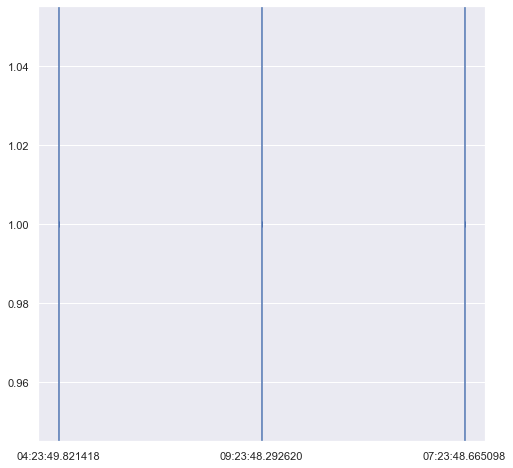

In [96]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot_date(sample['str_time'], sample['val'], marker="|")

# ax.xaxis_date()
# xfmt = md.DateFormatter('%H:%M:%S')
# ax.xaxis.set_major_formatter(xfmt)

for x in sample['str_time']:
    ax.axvline(x)